In [9]:
#Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#Load the dataset:
df = pd.read_csv(r"C:\Users\Vikram\Documents\UCD\Spring\Team Project\Data\train_data.csv")
df

,ID,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,...,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad,speaker_id,list,sentiment_code
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0,1,...,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887,_0_,"[0, 1]",_NEG_
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0,0,...,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045,_1_,"[0, 1]",_NEG_
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70,71,...,-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453,_2_,"[1, 0]",_NEG_
3,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7,19,...,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403,_3_,"[0, 1]",_NEG_
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15,9,...,0.0,0.0,0.044237,0.215996,0.222402,0.045672,0.274343,_4_,"[0, 1]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10231,5473.json,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,NaN,Florida,none,0,1,...,-0.6,0.6,0.354176,0.290966,0.020772,0.176219,0.216899,_1054_,"[1, 0]",_NEG_
10232,3408.json,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,NaN,Georgia,republican,0,0,...,0.0,0.0,0.189920,0.077568,0.050404,0.196092,0.410885,_2910_,"[1, 0]",NaN
10233,3959.json,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,NaN,Georgia,republican,4,11,...,-0.4,0.4,0.119778,0.206043,0.152902,0.095003,0.220693,_540_,"[0, 1]",_NEG_
10234,2253.json,FALSE,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,NaN,Florida,democrat,3,1,...,0.0,0.0,0.113820,0.066778,0.312947,0.242768,0.084354,_376_,"[0, 1]",NaN


#### Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10236 entries, 0 to 10235
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    10236 non-null  object 
 1   label                 10236 non-null  object 
 2   statement             10236 non-null  object 
 3   subject               10236 non-null  object 
 4   speaker               10236 non-null  object 
 5   speaker_job           7342 non-null   object 
 6   state_info            8030 non-null   object 
 7   party_affiliation     10236 non-null  object 
 8   barely_true_counts    10236 non-null  int64  
 9   false_counts          10236 non-null  int64  
 10  half_true_counts      10236 non-null  int64  
 11  mostly_true_counts    10236 non-null  int64  
 12  pants_on_fire_counts  10236 non-null  int64  
 13  context               10136 non-null  object 
 14  sentiment             8848 non-null   object 
 15  sentiment_score    

C:\Users\Vikram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


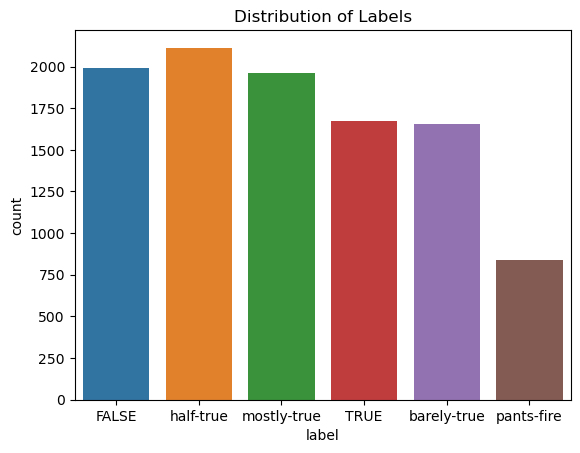

In [4]:
# Check the structure and basic statistics of the dataset
df.head()
df.info()
df.describe()

# Check the distribution of the target variable
sns.countplot(df['label'])
plt.title('Distribution of Labels')
plt.show()

####  Data Cleaning and Preprocessing

In [21]:

# Fill missing values, if any
df = df.fillna('')

# Perform text cleaning and preprocessing (e.g., removing special characters, converting to lowercase)
import re

def preprocess_text(text):
    # Remove special characters and symbols
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove extra whitespaces
    text = re.sub(r"\s+", " ", text)
    
    # Other preprocessing steps (if any)
    
    return text


df['statement'] = df['statement'].apply(preprocess_text)

# Split the dataset into train and test sets
X = df['statement']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


####  Feature Extraction

In [22]:
# Convert text data to numerical features using TF-IDF vectorization
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

#### Model Training and Evaluation

In [23]:
#Train the logistic regression model:
model = LogisticRegression()
model.fit(X_train_vect, y_train)

C:\Users\Vikram\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
# Make predictions on the test set:
y_pred = model.predict(X_test_vect)

In [25]:
#Evaluate the model's performance:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.23876953125
Classification Report:
              precision    recall  f1-score   support

       FALSE       0.24      0.29      0.27       391
        TRUE       0.25      0.22      0.23       351
 barely-true       0.25      0.20      0.22       352
   half-true       0.28      0.30      0.29       435
 mostly-true       0.19      0.22      0.20       370
  pants-fire       0.19      0.13      0.15       149

    accuracy                           0.24      2048
   macro avg       0.23      0.22      0.23      2048
weighted avg       0.24      0.24      0.24      2048

Confusion Matrix:
[[114  51  58  80  66  22]
 [ 70  76  31  67  96  11]
 [ 87  37  69  82  60  17]
 [ 86  53  59 131  90  16]
 [ 68  75  36  94  80  17]
 [ 42  16  25  19  28  19]]


#### Bar plot of sentiment distribution:

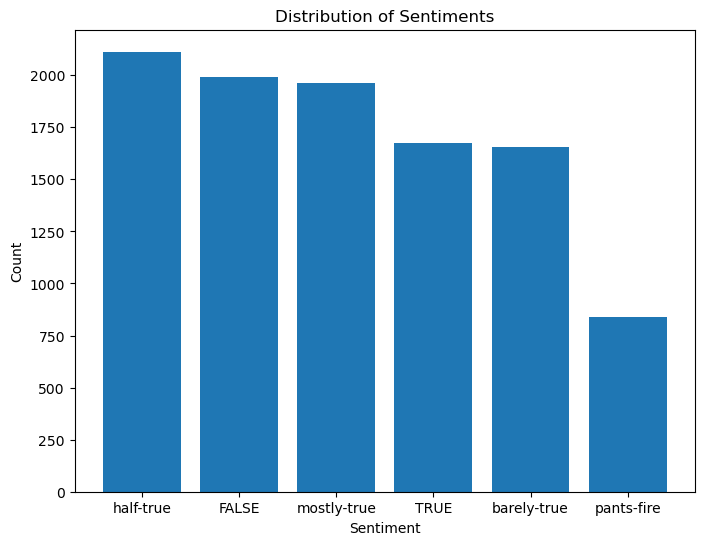

In [26]:
sentiment_counts = df['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()

#### Confusion matrix

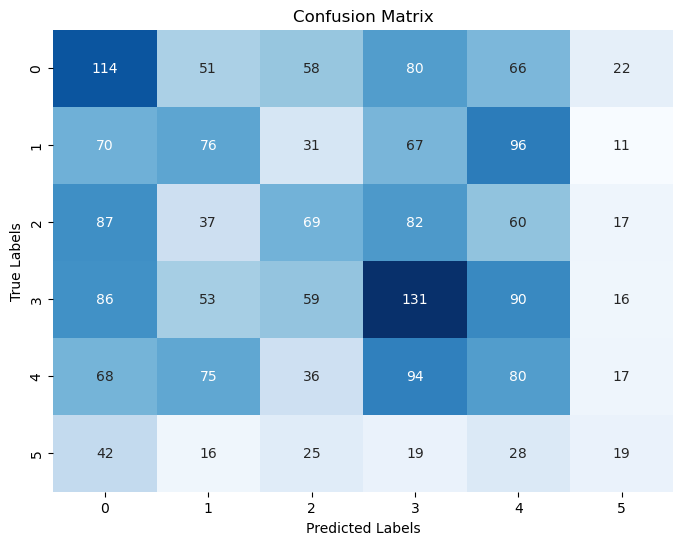

In [28]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### Heatmap of sentiment correlation

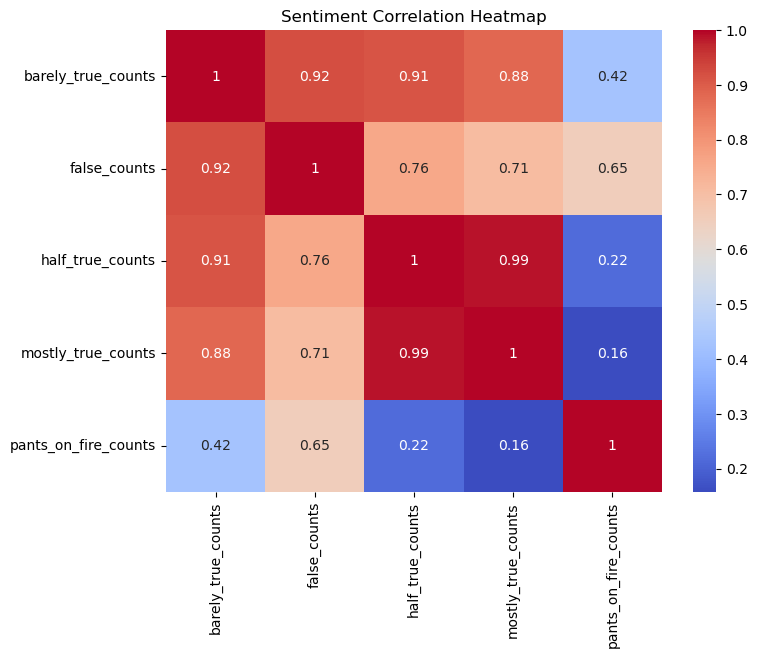

In [29]:
sentiment_corr = df[['barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(sentiment_corr, annot=True, cmap='coolwarm')
plt.title('Sentiment Correlation Heatmap')
plt.show()


#### Stacked bar plot of sentiment distribution by sentiment code:

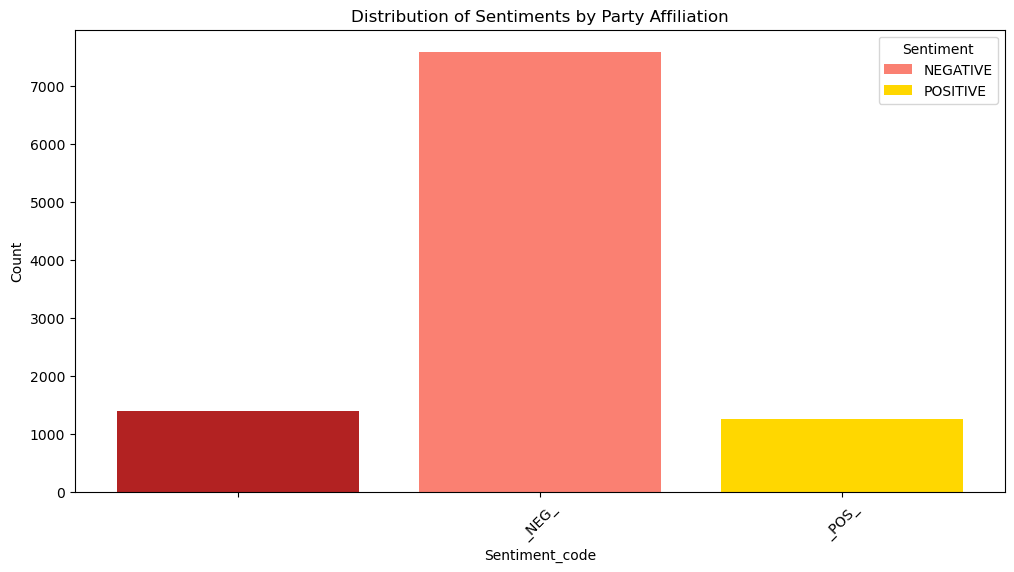

In [31]:
grouped_data = df.groupby(['sentiment_code', 'sentiment']).size().unstack()

plt.figure(figsize=(12, 6))
colors = ['firebrick', 'salmon', 'gold', 'limegreen', 'darkgreen']
sentiments = grouped_data.columns

for i, sentiment in enumerate(sentiments):
    plt.bar(grouped_data.index, grouped_data[sentiment], label=sentiment, color=colors[i])

plt.xlabel('Sentiment_code')
plt.ylabel('Count')
plt.title('Distribution of Sentiments by Party Affiliation')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()

#### Box plot of sentiment scores by sentiment:

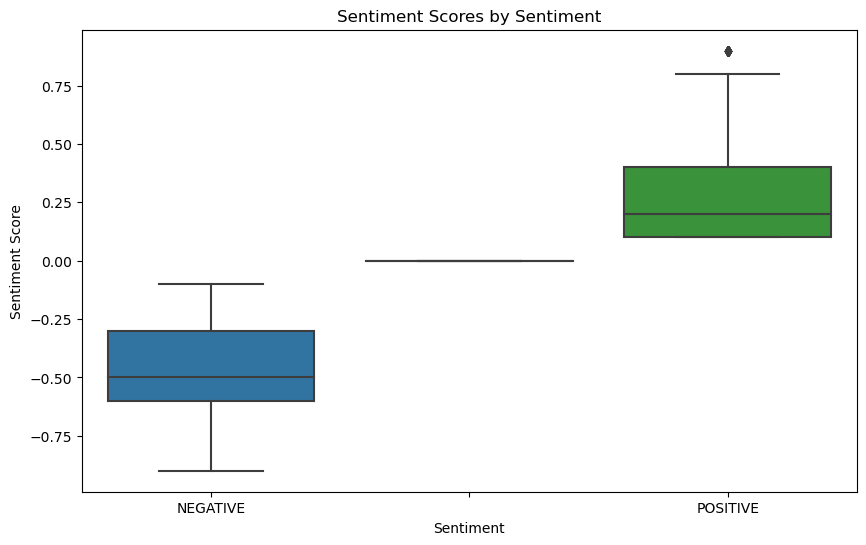

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='sentiment_score', data=df)
plt.xlabel('Sentiment')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores by Sentiment')
plt.show()